# DNN 모델을 이용한 Cifar-10 데이터셋 분류

## GPU 설정

In [15]:
# 코드작성] GPU 상태 체크

!nvidia-smi

Fri Mar 10 03:58:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## step1. Cifar-10 datasets 준비

In [16]:
# import 
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np


In [17]:
#  cifar10 데이터셋 load_data()
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [18]:
#  train, test dataset 탐색 : shape
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [19]:
train_images[0].shape

(32, 32, 3)

### 1-1 분류명을 직관적으로 출력

In [20]:
# train_labels 값 보기
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [22]:
# train_labels[3][0] 의 값은 
train_labels[3][0]

4

In [23]:
# train_labels[3][0] 클래스 이름은?
class_names[4]

'deer'

In [24]:
# [질문] 맨 마지막 image는 무엇인가요? 
class_names[train_labels[-1][0]]

'automobile'

In [25]:
# [질문] train_labels 10번째 class_names = index 9 ??

print(train_labels[10])
print(class_names[-1])

[4]
truck


In [26]:
# 그래프로 표현하기 


### 1-2 이미지 전처리
- 이미지의 픽셀값을 0과 1 사이로 스케일을 조정 - 정규화
- 먼저 float32 로 typecasting 후 정규화

In [27]:
# train_images 의 datatype 출력

In [28]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [29]:
#flatten (Sample의 1차원 텐서로 변경하는 과정)

In [30]:
train_images = train_images.reshape(50000, 32 * 32 * 3)
test_images = test_images.reshape(10000, 32 * 32 * 3)

In [31]:
print(train_images.shape)
print(test_images.shape)

(50000, 3072)
(10000, 3072)


### 1-3 레이블 인코딩
- 레이블을 범주형으로 인코딩
- to_categorical 사용

In [32]:
# to_categorical import 
from tensorflow.keras.utils import to_categorical

In [33]:
# 레이블을 범주형으로 인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [34]:
# 첫번째 레이블을 출력해보기
print(train_labels[0])
print(test_labels[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## step2. DNN 모델 디자인

In [35]:
# models, layers import 
from tensorflow.keras import models, layers

In [36]:
# Sequential 모델 객체 생성
model = models.Sequential()
model.add(layers.Dense(units=512, activation='relu', input_shape=(32 * 32 * 3,)))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [37]:
# model summary 보기
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [38]:
32 * 32 * 3 * 512 + 512 #1번 Hidden Layer Parameter 개수

1573376

In [39]:
512 * 256 + 256 #2번 Hidden Layer Parameter 개수

131328

In [40]:
256 * 10 + 10 #Output Layer Parameter 개수

2570

## step3. 훈련 준비하기 (컴파일 단계)
- optimizer : rmsprop
- loss (손실함수 ) : categorical_crossentropy
- metrics : accuracy

In [41]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

## step4. 훈련하기 
- x : 입력 데이터
- y : 입력 라벨 값
- batch_size : 64
- epochs : 30
- validation_split : 0.2

In [42]:
history = model.fit(train_images, train_labels, 
                    epochs=30,                   
                    batch_size=64,              
                    validation_split=0.2)

Epoch 1/30
625/625 [==============================] - 8s 5ms/step - loss: 2.0401 - accuracy: 0.2815 - val_loss: 1.9271 - val_accuracy: 0.3216
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 1.7489 - accuracy: 0.3767 - val_loss: 1.6978 - val_accuracy: 0.3896
Epoch 3/30
625/625 [==============================] - 3s 4ms/step - loss: 1.6583 - accuracy: 0.4073 - val_loss: 1.6935 - val_accuracy: 0.3923
Epoch 4/30
625/625 [==============================] - 2s 4ms/step - loss: 1.6011 - accuracy: 0.4304 - val_loss: 1.6268 - val_accuracy: 0.4239
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 1.5603 - accuracy: 0.4432 - val_loss: 1.6042 - val_accuracy: 0.4350
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 1.5238 - accuracy: 0.4574 - val_loss: 1.5947 - val_accuracy: 0.4446
Epoch 7/30
625/625 [==============================] - 2s 4ms/step - loss: 1.4952 - accuracy: 0.4677 - val_loss: 1.5519 - val_accuracy: 0.4477
Epoch 

In [43]:
50000 * 0.8 / 64

625.0

## step5. 모델 평가하기 

In [44]:
# test_images로 모델 평가하기 
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.6852 - accuracy: 0.4679


## Step6. 성능 시각화

In [45]:
# matplotlib import 
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

- Training and validation accuracy 그리기

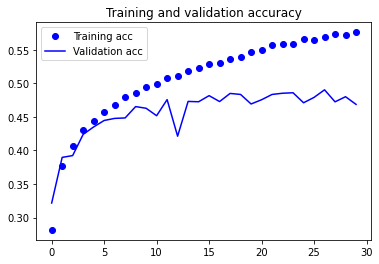

In [46]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

- Training and validation loss 그래프 그리기

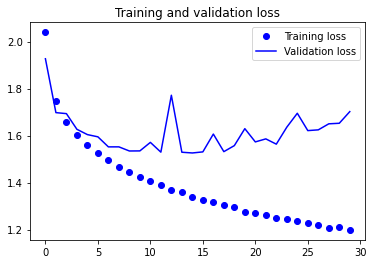

In [47]:
# Training and validation loss 그래프 그리기
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## step7. 모델 사용하기

In [48]:
# numpy import 


In [49]:
# test_image[0]로 예측하기

predict = model.predict(test_images[-1].reshape(1, 32 * 32 * 3))

print("predict probability:", predict)  
print('predict number:', np.argmax(predict))
print('predict name:', class_names[np.argmax(predict)])

1/1 [==============================] - 0s 97ms/step
predict probability: [[7.9515530e-03 3.0243196e-04 2.1253581e-01 4.2915195e-02 1.9861411e-01
  3.7527699e-02 1.9739963e-02 4.7555938e-01 1.6375004e-03 3.2164303e-03]]
predict number: 7
predict name: horse


In [50]:
test_labels[-1]
print('predict name:', class_names[np.argmax(test_labels[-1])])

predict name: horse


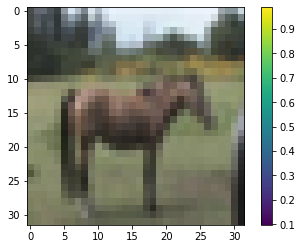

In [51]:
# test_image[0] 이미지보기
plt.figure()
plt.imshow(test_images[-1].reshape(32, 32, 3))
plt.colorbar()
plt.grid(False)
plt.show()